# Fudan PRML 23Spring Assignment1

<font color='orange'>*Your Name, Student ID and Date: 朱奕新, 19307090029, 2023/04/11*</font>    

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission.*

<font color='red' size = 3> *DDL: 2023.04.16 23:59* </font>

## 1. FDUML: your toy sklearn-like machine learning library (40 points)

In this assignment, you will fist implement your own sklearn-like machine learning library with `numpy`, named `fduml`.

sklearn: [scikit-learn: Machine Learning in Python](https://scikit-learn.org/stable/#)

In [362]:
# setup code, auto reload your .py file
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [363]:
# numpy
import numpy as np
np.random.seed(233)

In [364]:
# matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

You have to impletement several standard regression and classification methods in the `./fduml` folder:
1.   Linear Regression (10 points)
2.   kNN Classification (10 points)
3.   DecisionTree Classification (10 points)
4.   Softmax Classification (10 points)

We have written most of the code for you already, and you only need to fill in the most essential parts. We have also prepared several test cases for you to check if your code works correctly.

Furthermore, you can also test the accuracy of your code by comparing its output with the output of sk-learn.

<font color='orange'>以上代码都已完成，并通过对应test文件夹下的测试用例。</font>

In [365]:
# 导入fduml和sklearn
# 将来的实验中会比较两者的结果
from fduml import *
import sklearn as skl

## 2. Optimization and Regularization (10 points)

To help you better understand the two fundamental concepts of `optimization` and `generalization` in machine learning, we have prepared a small experiment for you.

This section will make use of the `linear regression` algorithm that you have previously written. If you find that you need to improve your previous code to complete this section, you can go back and modify it.

**Dataset Construction**

We create a toy dataset for you sampled from the sin function (with Gaussian noise):

In [366]:
import math

# sin
def sin(x):
    y = np.sin(2 * math.pi * x)
    return y

In [367]:
def create_toy_data(func, interval, sample_num, noise = 0.0, add_outlier = False, outlier_ratio = 0.001):
    """
    generate data with the given function
    
    input：
       - func：the input function
       - interval： the range of values of x, a tuple (start, end)
       - sample_num： number of samples
       - noise： the standard deviation of Gaussian noise
       - add_outlier：whether to generate outliers
       - outlier_ratio：proportion of outliers
       
    output：
       - X: samples，shape = [n_samples,1]
       - y: labels，shape = [n_samples,1]
    """
    
    X = np.random.rand(sample_num,1) * (interval[1]-interval[0]) + interval[0]
    y = func(X)

    # add Gaussian noise
    epsilon = np.random.normal(0, noise, (sample_num,1))
    y = y + epsilon
    
    # add outlier 异常值
    if add_outlier:
        outlier_num = int(sample_num * outlier_ratio)
        if outlier_num != 0:
            outlier_idx = np.random.randint(sample_num, size = [outlier_num,1])
            y[outlier_idx] = y[outlier_idx] * 5 # 随机选取index，5倍异常值
            
    return X, y

In [368]:
import math

# sin
def sin(x):
    y = np.sin(2 * math.pi * x)
    return y

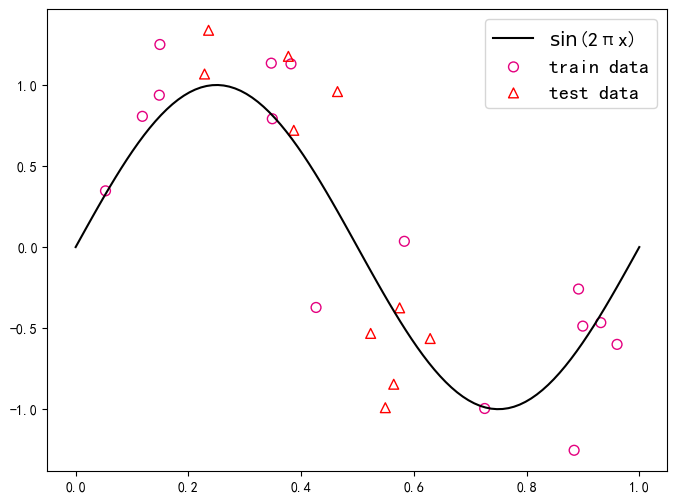

In [369]:
# generate toy dataset
func = sin
interval = (0,1)
train_num = 15
test_num = 10
noise = 0.5
X_train, y_train = create_toy_data(func=func, interval=interval, sample_num=train_num, noise = noise)
X_test, y_test = create_toy_data(func=func, interval=interval, sample_num=test_num, noise = noise)

X_underlying = np.linspace(interval[0],interval[1],num=100)
y_underlying = sin(X_underlying)

# plot
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(X_underlying, y_underlying, c='#000000', label=r"$\sin(2\pi x)$")
plt.scatter(X_train, y_train, facecolor="none", edgecolor='#e4007f', s=50, label="train data")
plt.scatter(X_test, y_test, facecolor="none", edgecolor="r", marker = '^', s=50, label="test data")
plt.legend(fontsize='x-large')
plt.rc('axes', unicode_minus=False)
plt.show()

**Your Tasks (10 points)**

1) Take the `linear regression algorithm` you implemented with a `polynomial basis function` to implement a `polynomial regression algorithm` to fit the above training data;    
2) Test the performance of the fitted model on the training set and test set (mean squared error);      
3) Degrees of polynomials you need to try at least: 0, 1, 3, 8, 12;    
4) You should also try polynomial regression with a regularization term;   
5) You need to visualize the fitted function;

Write your implementation code below or in `fduml`, please write comments:

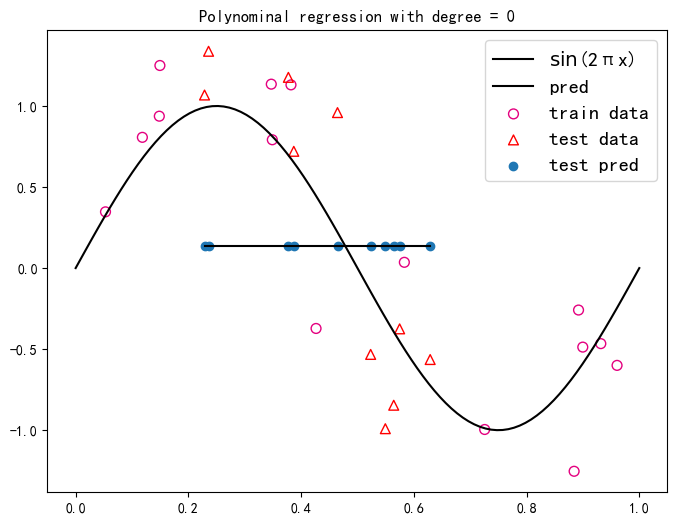

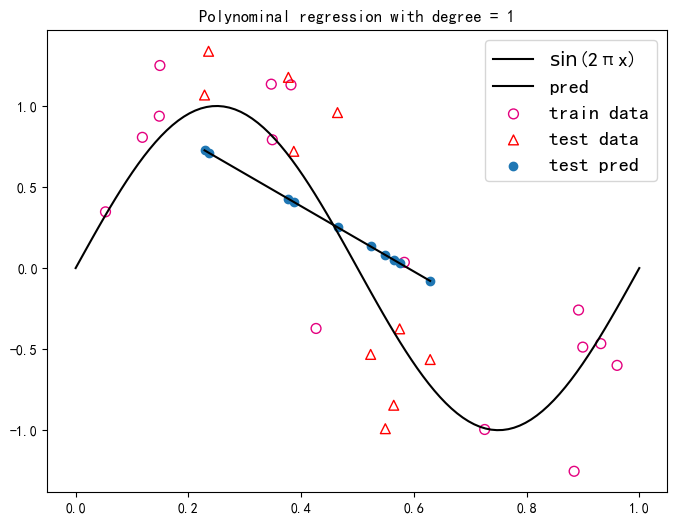

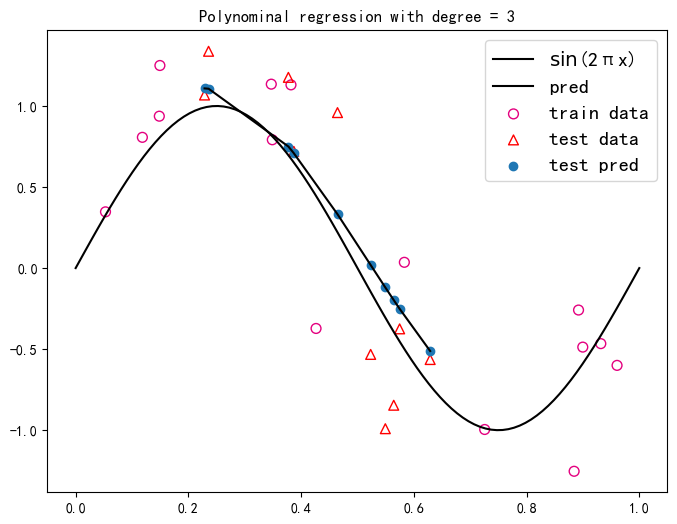

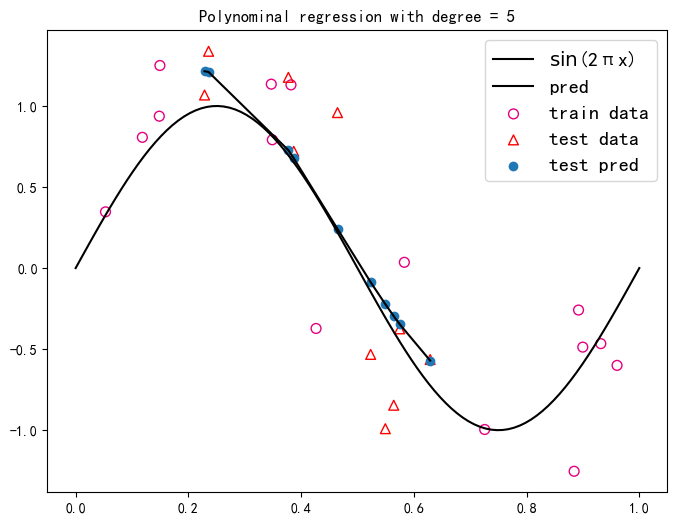

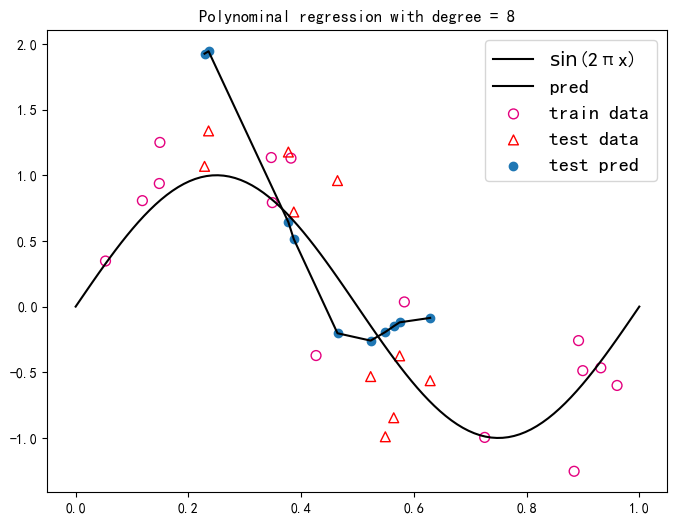

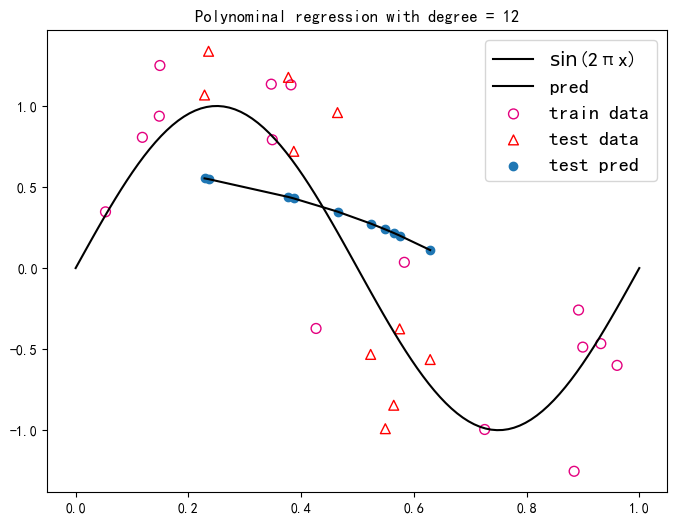

In [370]:
# the self-made polynomial regression model is in the module below
from fduml.linear_model.polynominal_reg import PolynominalRegression
def polyRegressionAndDraw(degree):
    # fit using polynomial regression
    # if there is no enough rank, will use redge regression as regularization term
    model = PolynominalRegression()
    model.fit(X_train, y_train, degree)

    # predict
    y_test_pred = model.predict(X_test, degree)
    idx = np.argsort(X_test, axis=0)

    # 对x和y进行排序
    X_test_sorted = X_test[idx].flatten()
    y_test_pred_sorted = y_test_pred[idx].flatten()


    # use plot to output the result
    plt.rcParams['figure.figsize'] = (8.0, 6.0)
    plt.plot(X_underlying, y_underlying, c='#000000', label=r"$\sin(2\pi x)$")
    plt.scatter(X_train, y_train, facecolor="none", edgecolor='#e4007f', s=50, label="train data")
    plt.scatter(X_test, y_test, facecolor="none", edgecolor="r", marker = '^', s=50, label="test data")
    plt.scatter(X_test, y_test_pred, label="test pred")
    plt.plot(X_test_sorted, y_test_pred_sorted, c='#000000', label=r"pred")
    plt.legend(fontsize='x-large')
    plt.title('Polynominal regression with degree = {}'.format(degree))
    plt.rc('axes', unicode_minus=False)
    plt.show()

polyRegressionAndDraw(0)
polyRegressionAndDraw(1)
polyRegressionAndDraw(3)
polyRegressionAndDraw(5)
polyRegressionAndDraw(8)
polyRegressionAndDraw(12)




## 3. Machine Learning with Tabular Data (50 points)

### 1) Task Introduction

In this section, you will use the algorithms you implemented to solve more realistic tasks.

You are given a dataset of heart attack predictions. For each patient, there are some characteristics of him/her in the dataset. Your task is to build a machine learning model to predict whether he/she has heart disease based on these features.

### 2) Dataset Introduction

The training and testing datasets are in the `dataset` folder.

The following is an introduction to the attributes in the dataset:

-   Age : Age of the patient

-   Sex : Sex of the patient (1:male, 0:female)

-   cp : Chest Pain type

    -   Value 0: typical angina

    -   Value 1: atypical angina

    -   Value 2: non-anginal pain

    -   Value 3: asymptomatic

-   trtbps : resting blood pressure (in mm Hg)

-   chol: cholesterol in mg/dl fetched via BMI sensor

-   fbs: (fasting blood sugar > 120 mg/dl)

    -   1 = true

    -   0 = false

-   rest_ecg: resting electrocardiographic results

    -   Value 0: normal

    -   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

    -   Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

-   thalach: maximum heart rate achieved

-   exang: exercise induced angina

    -   1 = yes

    -   0 = no

-   old peak: ST depression induced by exercise relative to rest

-   slp: the slope of the peak exercise ST segment

    -   0 = unsloping

    -   1 = flat

    -   2 = downsloping

-   caa: number of major vessels (0-3)

-   thall : thalassemia

    -   0 = null

    -   1 = fixed defect

    -   2 = normal

    -   3 = reversable defect

-   output: diagnosis of heart disease (angiographic disease status)

    -   0: < 50% diameter narrowing. less chance of heart disease

    -   1: > 50% diameter narrowing. more chance of heart disease

### 3) Load Your Dataset

Different people may be assigned different datasets, please write your training dataset number here:<font color='red'> *[train0]* </font>

In [371]:
import pandas as pd
# load dataset from csv file
def load_data(path):
    """
    load dataset from csv file
    
    input：
       - path：the path of csv file
       
    output：
       - X_train: training samples，shape = [n_samples,n_features]
       - y_train: training labels，shape = [n_samples,n_features]
       - X_test: testing samples，shape = [n_samples,n_features]
       - y_test: testing labels，shape = [n_samples,n_features]
    """
    data = pd.read_csv(path,header=0, index_col=0)
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    

    return X, y

X_train, y_train = load_data('dataset/train0.csv')
X_test, y_test = load_data('dataset/test.csv')


### 4) Exploratory Data Analysis (5 points)

Data is an important part of machine learning, and many people tend to ignore the analysis of data. In this part of the assignment, you will first conduct [exploratory data analysis (EDA)](https://en.wikipedia.org/wiki/Exploratory_data_analysis) on your given dataset. More analysis is encourages. More than statistics and figures, it is better to draw some conclusions from that. 

Such analysis helps you to know the distribution of your data. Besides, it may also help you find out the **TRAPS** inside the data.
If you find any TRAPS, report the detail of them and how you will alleviate the harm they bring. You don't need to do much processing on the TRAPS here, you only need to perform statistical analysis on the data.

In [372]:
import scipy.stats as stats

# we have got X_train and y_train, and we can use data mining such as PCA
# exploratory data analysis
# explore each column of X_train

# age
print("开始检验age和output之间的相关性")
age = X_train['age']
output = y_train
r, p = stats.pointbiserialr(age, output)
print("点双列相关系数为：", r)
print("p值为：", p)
print(" ")



开始检验age和output之间的相关性
点双列相关系数为： -0.09031878590864709
p值为： 0.2716942556326177
 


In [373]:
# sex
print("开始检验sex和output之间的相关性")
sex = X_train['sex']
output = y_train
table = pd.crosstab(sex, output)
chi2, p, dof, expected = stats.chi2_contingency(table)
print('实际频数为：', table)
print('卡方值为：', chi2)
print('p值为：', p)
print('自由度为：', dof)
print('期望频数为：\n', expected)
print(" ")

开始检验sex和output之间的相关性
实际频数为： output   0   1
sex           
0       21  17
1       99  13
卡方值为： 17.448161419172934
p值为： 2.9524970942445185e-05
自由度为： 1
期望频数为：
 [[30.4  7.6]
 [89.6 22.4]]
 


In [374]:
# cp
print("开始检验cp和output之间的相关性")
cp = X_train['cp']
output = y_train
table = pd.crosstab(cp, output)
chi2, p, dof, expected = stats.chi2_contingency(table)
print('实际频数为：', table)
print('卡方值为：', chi2)
print('p值为：', p)
print('自由度为：', dof)
print('期望频数为：\n', expected)
print(" ")


开始检验cp和output之间的相关性
实际频数为： output   0   1
cp            
0       92   7
1        9   8
2       14  13
3        5   2
卡方值为： 31.814645049939166
p值为： 5.725979680570038e-07
自由度为： 3
期望频数为：
 [[79.2 19.8]
 [13.6  3.4]
 [21.6  5.4]
 [ 5.6  1.4]]
 


In [375]:
# trtbps
print("开始检验trtbps和output之间的相关性")
trtbps = X_train['trtbps']
output = y_train
r, p = stats.pointbiserialr(trtbps, output)
print("点双列相关系数为：", r)
print("p值为：", p)
print(" ")

开始检验trtbps和output之间的相关性
点双列相关系数为： -0.08559277415946513
p值为： 0.2976731442560016
 


In [376]:
# chol
print("开始检验chol和output之间的相关性")
chol = X_train['chol']
output = y_train
r, p = stats.pointbiserialr(chol, output)
print("点双列相关系数为：", r)
print("p值为：", p)
print(" ")

开始检验chol和output之间的相关性
点双列相关系数为： -0.030027433839041655
p值为： 0.7152866432104635
 


In [377]:
# fbs
print("开始检验fbs和output之间的相关性")
fbs = X_train['fbs']
output = y_train
table = pd.crosstab(fbs, output)
chi2, p, dof, expected = stats.chi2_contingency(table)
print('实际频数为：', table)
print('卡方值为：', chi2)
print('p值为：', p)
print('自由度为：', dof)
print('期望频数为：\n', expected)
print(" ")

开始检验fbs和output之间的相关性
实际频数为： output    0   1
fbs            
0       101  28
1        19   2
卡方值为： 1.0001384274640088
p值为： 0.3172770147873324
自由度为： 1
期望频数为：
 [[103.2  25.8]
 [ 16.8   4.2]]
 


In [378]:
# restecg
print("开始检验restecg和output之间的相关性")
restecg = X_train['restecg']
output = y_train
table = pd.crosstab(restecg, output)
chi2, p, dof, expected = stats.chi2_contingency(table)
print('实际频数为：', table)
print('卡方值为：', chi2)
print('p值为：', p)
print('自由度为：', dof)
print('期望频数为：\n', expected)
print(" ")

开始检验restecg和output之间的相关性
实际频数为： output    0   1
restecg        
0        67  11
1        50  19
2         3   0
卡方值为： 4.894788182831661
p值为： 0.08651875295136213
自由度为： 2
期望频数为：
 [[62.4 15.6]
 [55.2 13.8]
 [ 2.4  0.6]]
 


In [379]:
# thalachh
print("开始检验thalachh和output之间的相关性")
thalachh = X_train['thalachh']
output = y_train
r, p = stats.pointbiserialr(thalachh, output)
print("点双列相关系数为：", r)
print("p值为：", p)
print(" ")

开始检验thalachh和output之间的相关性
点双列相关系数为： 0.3064421195273851
p值为： 0.00013678469953564586
 


In [380]:
# exng
print("开始检验exng和output之间的相关性")
exng = X_train['exng']
output = y_train
table = pd.crosstab(exng, output)
chi2, p, dof, expected = stats.chi2_contingency(table)
print('实际频数为：', table)
print('卡方值为：', chi2)
print('p值为：', p)
print('自由度为：', dof)
print('期望频数为：\n', expected)
print(" ")

开始检验exng和output之间的相关性
实际频数为： output   0   1
exng          
0       53  26
1       67   4
卡方值为： 15.726399536459262
p值为： 7.31954443670838e-05
自由度为： 1
期望频数为：
 [[63.2 15.8]
 [56.8 14.2]]
 


In [381]:
# oldpeak
print("开始检验oldpeak和output之间的相关性")
oldpeak = X_train['oldpeak']
output = y_train
r, p = stats.pointbiserialr(oldpeak, output)
print("点双列相关系数为：", r)
print("p值为：", p)
print(" ")

开始检验oldpeak和output之间的相关性
点双列相关系数为： -0.3609159621239378
p值为： 5.700472830337443e-06
 


In [382]:
# slp
print("开始检验slp和output之间的相关性")
slp = X_train['slp']
output = y_train
table = pd.crosstab(slp, output)
chi2, p, dof, expected = stats.chi2_contingency(table)
print('实际频数为：', table)
print('卡方值为：', chi2)
print('p值为：', p)
print('自由度为：', dof)
print('期望频数为：\n', expected)
print(" ")

开始检验slp和output之间的相关性
实际频数为： output   0   1
slp           
0       11   1
1       78   6
2       31  23
卡方值为： 26.92625661375661
p值为： 1.4224521536908713e-06
自由度为： 2
期望频数为：
 [[ 9.6  2.4]
 [67.2 16.8]
 [43.2 10.8]]
 


In [383]:
# caa
print("开始检验caa和output之间的相关性")
caa = X_train['caa']
output = y_train
table = pd.crosstab(caa, output)
chi2, p, dof, expected = stats.chi2_contingency(table)
print('实际频数为：', table)
print('卡方值为：', chi2)
print('p值为：', p)
print('自由度为：', dof)
print('期望频数为：\n', expected)
print(" ")

开始检验caa和output之间的相关性
实际频数为： output   0   1
caa           
0       44  21
1       40   4
2       24   3
3       12   0
4        0   2
卡方值为： 21.75990675990676
p值为： 0.00022372319871280302
自由度为： 4
期望频数为：
 [[52.  13. ]
 [35.2  8.8]
 [21.6  5.4]
 [ 9.6  2.4]
 [ 1.6  0.4]]
 


In [384]:
# thall
print("开始检验thall和output之间的相关性")
thall = X_train['thall']
output = y_train
table = pd.crosstab(thall, output)
chi2, p, dof, expected = stats.chi2_contingency(table)
print('实际频数为：', table)
print('卡方值为：', chi2)
print('p值为：', p)
print('自由度为：', dof)
print('期望频数为：\n', expected)
print(" ")

开始检验thall和output之间的相关性
实际频数为： output   0   1
thall         
0        1   0
1       12   0
2       32  27
3       75   3
卡方值为： 40.44573011734029
p值为： 8.571618760993979e-09
自由度为： 3
期望频数为：
 [[ 0.8  0.2]
 [ 9.6  2.4]
 [47.2 11.8]
 [62.4 15.6]]
 


<font color='orange'>Therefore, we can conclude that following features are important for heart disease prediction:

<font color='red'>sex, cp, thalach, exang, oldpeak, slp, caa, thall</font>


This is because these features have the highest correlation with the output.</font>

### 5) Build Your Baselines (15 points)

You need to use at least three algorithms of `kNN`, `decision tree`, and `logistic regression` to complete this task.

The following code may include data processing, model building, model training, model evaluation and other parts. You can also organize this part of code according to your ideas.    
You may need to build the validation set yourself.  
You can test whether your model can fit a few samples first, and then test on the full dataset.  
You may need to test the speed of the vectorized implementation of several algorithms.    
Visualization is encouraged.   
Please follow standard machine learning procedures, i.e. you CANNOT use the test set at any time to tune the parameters of the model. 

Note: *This section mainly verifies the correctness of your previous code and gets the baseline results.*

In [385]:
# data processing
# 暂时不用，将在探索部分考虑数据归一化等操作

**a) kNN**

开始使用fduml.knn对thalach和oldpeak进行处理
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
正确个数为25， 总个数为46， 正确率为54.35%


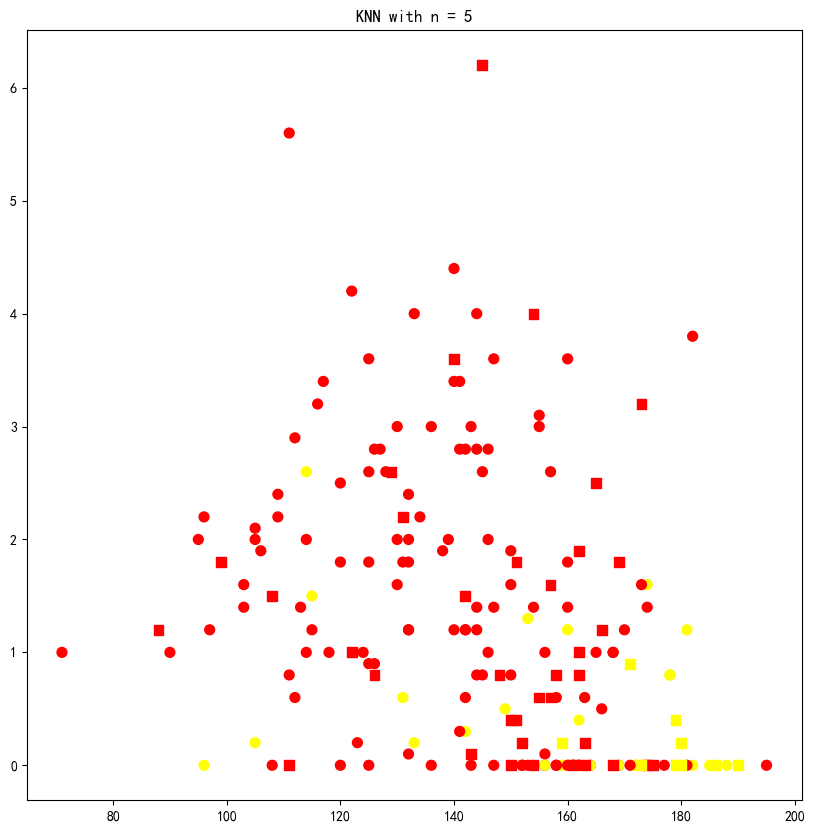

(25,
 46,
 0.5434782608695652,
 array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [386]:
from sklearn.preprocessing import normalize
# use fduml.knn on thalach and oldpeak
def useKnnAndDraw(n=3, draw=True):
    print("开始使用fduml.knn对thalach和oldpeak进行处理")
    thalachh = X_train['thalachh']
    oldpeak = X_train['oldpeak']
    X_knn  = pd.DataFrame({'thalachh': thalachh.values, 'oldpeak': oldpeak.values}).to_numpy()
    # X_knn = normalize(X_knn, axis=0)

    thalachh_test = X_test['thalachh']
    oldpeak_test = X_test['oldpeak']
    X_knn_test = pd.DataFrame({'thalachh': thalachh_test.values, 'oldpeak': oldpeak_test.values}).to_numpy()
    # X_knn_test = normalize(X_knn_test, axis=0)

    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_knn, y_train)
    y_pred = knn.predict(X_knn_test)
    print(y_pred)

    same = np.sum(y_pred == y_test) # count how many elements are equal
    total = np.size(y_pred) # get the total number of elements
    ratio = same / total # calculate the proportion of equal elements
    print('正确个数为{}， 总个数为{}， 正确率为{:.2f}%'.format(same, total, ratio * 100))

    if(draw):
        # plot the result
        plt.figure(figsize=(10, 10))
        plt.scatter(X_knn[:, 0], X_knn[:, 1], c=y_train, s=50, cmap='autumn', label='train data')
        plt.scatter(X_knn_test[:, 0], X_knn_test[:, 1], c=y_pred, s=50, cmap='autumn', marker='s', label='test data')
        plt.title('KNN with n = {}'.format(n))
        plt.show()

    return same, total, ratio, y_pred

useKnnAndDraw(5, draw=True)


<font color='orange'> 
上图中形象化了KNN算法的使用，圆形表示的是训练数据，正方形表示的是测试数据。


对于训练数据，红色表示output=0，黄色表示output=1。

对于测试数据，红色表示预测结果为0，黄色表示预测结果为1。
</font>

**b) Decision Tree**

In [387]:
# use decision tree on discrete variables
def useDecisionTree():
    print("开始使用fduml.decision_tree 处理sex, cp, exang, slp, caa")
    sex = X_train['sex']
    cp = X_train['cp']
    exng = X_train['exng']
    slp = X_train['slp']
    caa = X_train['caa']
    X_decision_tree = pd.DataFrame({'sex':sex.values, 'cp':cp.values, 'exng':exng.values, 'slp':slp.values, 'caa': caa.values}).to_numpy()

    sex_test = X_test['sex']
    cp_test = X_test['cp']
    exng_test = X_test['exng']
    slp_test = X_test['slp']
    caa_test = X_test['caa']
    X_decision_tree_test = pd.DataFrame({'sex':sex_test.values, 'cp':cp_test.values, 'exng':exng_test.values, 'slp':slp_test.values, 'caa': caa_test.values}).to_numpy()

    dt = DecisionTreeClassifier()
    dt.fit(X_decision_tree, y_train.to_numpy())
    y_pred = dt.predict(X_decision_tree_test)
    print(y_pred)

    same = np.sum(y_pred == y_test) # count how many elements are equal
    total = np.size(y_pred) # get the total number of elements
    ratio = same / total # calculate the proportion of equal elements
    print('正确个数为{}， 总个数为{}， 正确率为{:.2f}%'.format(same, total, ratio * 100))

    return same, total, ratio, y_pred

useDecisionTree()

开始使用fduml.decision_tree 处理sex, cp, exang, slp, caa
[0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 1 0 0 1 1 0 0 0]
正确个数为26， 总个数为46， 正确率为56.52%


(26,
 46,
 0.5652173913043478,
 array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0]))

**c) Logistic Regression**

In [388]:
# use logistic regression to classify
print("开始使用fduml.logistc_regression 处理")
def useLogisticRegression(learning_rate=2):
    sex = X_train['sex']
    cp = X_train['cp']
    exng = X_train['exng']
    slp = X_train['slp']
    caa = X_train['caa']
    X_lr = pd.DataFrame({'sex':sex.values, 'cp':cp.values, 'exng':exng.values, 'slp':slp.values, 'caa': caa.values}).to_numpy()

    sex_test = X_test['sex']
    cp_test = X_test['cp']
    exng_test = X_test['exng']
    slp_test = X_test['slp']
    caa_test = X_test['caa']
    X_lr_test = pd.DataFrame({'sex':sex_test.values, 'cp':cp_test.values, 'exng':exng_test.values, 'slp':slp_test.values, 'caa': caa_test.values}).to_numpy()


    lr =  SoftmaxClassifier(learning_rate=learning_rate, loss_type='naive')
    lr.fit(X_lr, y_train.to_numpy())
    y_pred = lr.predict(X_lr_test)
    print(y_pred)

    same = np.sum(y_pred == y_test) # count how many elements are equal
    total = np.size(y_pred) # get the total number of elements
    ratio = same / total # calculate the proportion of equal elements
    print('正确个数为{}， 总个数为{}， 正确率为{:.2f}%'.format(same, total, ratio * 100))

    return same, total, ratio, y_pred

useLogisticRegression(2)

开始使用fduml.logistc_regression 处理
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 0 0]
正确个数为27， 总个数为46， 正确率为58.70%


(27,
 46,
 0.5869565217391305,
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        0, 0], dtype=int64))

### 6) Exploration (25 points)

Now that you have built your baselines, you need to improve your solution. You can do more processing on the data, improve the model, adjust the evaluation indicators, and so on. You can explore and analyze as much as you can below.

#### 1. 对于模型超参数的调整

In [389]:
# KNN
# KNN 的超参数在于n_neighbors，这里使用实验来比较不同的n_neighbors的准确率
for i in range(30):
    same, total, ratio, y_pred = useKnnAndDraw(i+1, False)
    print('n_neighbors = {}, 正确个数为{}， 总个数为{}， 正确率为{:.2f}%'.format(i+1, same, total, ratio * 100))

开始使用fduml.knn对thalach和oldpeak进行处理
[0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
正确个数为25， 总个数为46， 正确率为54.35%
n_neighbors = 1, 正确个数为25， 总个数为46， 正确率为54.35%
开始使用fduml.knn对thalach和oldpeak进行处理
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
正确个数为21， 总个数为46， 正确率为45.65%
n_neighbors = 2, 正确个数为21， 总个数为46， 正确率为45.65%
开始使用fduml.knn对thalach和oldpeak进行处理
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
正确个数为24， 总个数为46， 正确率为52.17%
n_neighbors = 3, 正确个数为24， 总个数为46， 正确率为52.17%
开始使用fduml.knn对thalach和oldpeak进行处理
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
正确个数为22， 总个数为46， 正确率为47.83%
n_neighbors = 4, 正确个数为22， 总个数为46， 正确率为47.83%
开始使用fdum

<font color='orange'>
由此可见，对KNN算法，超参数的选择影响不大，且看不出明显的规律。
</font>

In [390]:
# Logistic Regression
# Logistic Regression 的超参数在于learning_rate，这里使用实验来比较不同的learning_rate的准确率
learning_rate = 0.00001
for i in range(30):
    learning_rate = learning_rate * 2
    same, total, ratio, y_pred = useLogisticRegression(learning_rate)
    print('learning_rate = {}, 正确个数为{}， 总个数为{}， 正确率为{:.2f}%'.format(learning_rate, same, total, ratio * 100))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0]
正确个数为17， 总个数为46， 正确率为36.96%
learning_rate = 2e-05, 正确个数为17， 总个数为46， 正确率为36.96%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
正确个数为18， 总个数为46， 正确率为39.13%
learning_rate = 4e-05, 正确个数为18， 总个数为46， 正确率为39.13%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
正确个数为18， 总个数为46， 正确率为39.13%
learning_rate = 8e-05, 正确个数为18， 总个数为46， 正确率为39.13%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
正确个数为18， 总个数为46， 正确率为39.13%
learning_rate = 0.00016, 正确个数为18， 总个数为46， 正确率为39.13%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
正确个数为18， 总个数为46， 正确率为39.13%
learning_rate = 0.00032, 正确个数为18， 总个数为46， 正确率为39.13%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
正确个数为18， 总个数为46， 正确率为39.13%
lea

d:\Desktop\大三下学期\模式识别与机器学习\practice\PRML-Spring23-FDU\PRML-Spring23-FDU\assignment1\fduml\linear_model\softmax.py:209: RuntimeWarning: divide by zero encountered in log
  loss += -np.log(p[y[i]])


[1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1
 1 1 0 0 1 1 0 0 0]
正确个数为35， 总个数为46， 正确率为76.09%
learning_rate = 167.77216, 正确个数为35， 总个数为46， 正确率为76.09%
[0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1
 1 1 0 0 1 1 0 0 0]
正确个数为33， 总个数为46， 正确率为71.74%
learning_rate = 335.54432, 正确个数为33， 总个数为46， 正确率为71.74%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
正确个数为18， 总个数为46， 正确率为39.13%
learning_rate = 671.08864, 正确个数为18， 总个数为46， 正确率为39.13%
[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 0 0]
正确个数为28， 总个数为46， 正确率为60.87%
learning_rate = 1342.17728, 正确个数为28， 总个数为46， 正确率为60.87%
[1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 0 0 0]
正确个数为36， 总个数为46， 正确率为78.26%
learning_rate = 2684.35456, 正确个数为36， 总个数为46， 正确率为78.26%
[1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1
 1 1 0 0 1 1 0 0 0]
正确个数为37， 总个数为

<font color='orange'>
由此可见，对logistic regression算法，超参数的选择影响较大。当学习率太大或太小时，模型效果都不好。但学习率适中时，模型效果较好。
</font>

#### 2. 对于数据的归一化

<font color='orange'>
我准备使用scikit-learn库中的preprocessing.normalize()函数来实现数据归一化。

normalize()函数可以对一个类似数组的数据集进行归一化，它会将每个向量单独缩放到一个单位范数，使得向量的长度为1。

这是因为原始数据中，各个特征的取值范围不同，从而影响模型的准确性。
</font>

开始使用fduml.knn对thalach和oldpeak进行处理
[1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
正确个数为31， 总个数为46， 正确率为67.39%


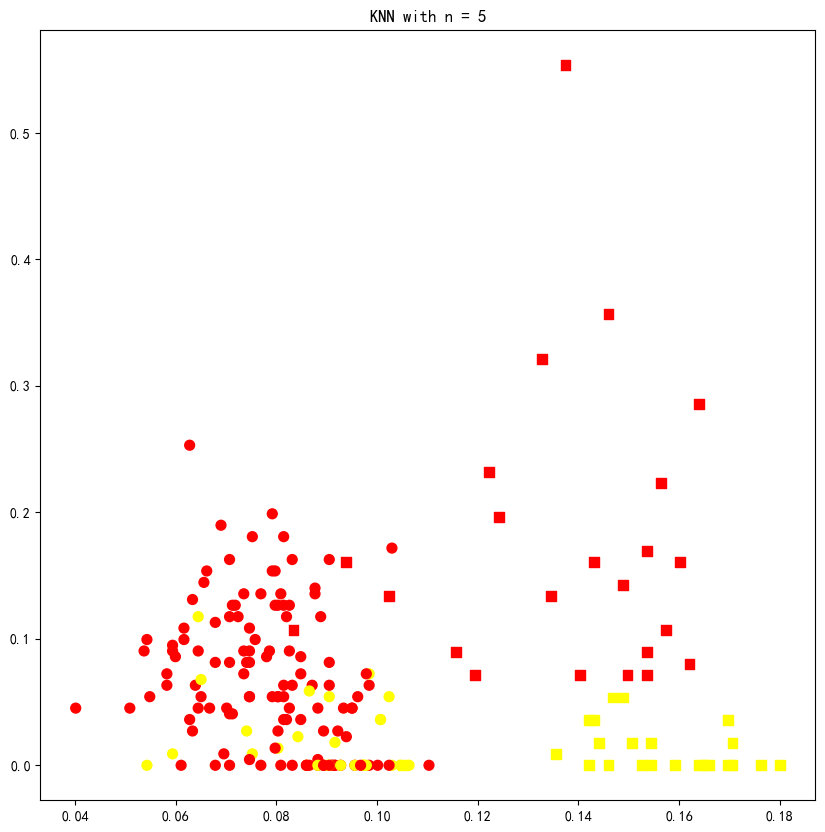

(31,
 46,
 0.6739130434782609,
 array([1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
        1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.]))

In [391]:
def useKnnNormalize(n=3, draw=True):
    print("开始使用fduml.knn对thalach和oldpeak进行处理")
    thalachh = X_train['thalachh']
    oldpeak = X_train['oldpeak']
    X_knn  = pd.DataFrame({'thalachh': thalachh.values, 'oldpeak': oldpeak.values}).to_numpy()
    X_knn = normalize(X_knn, axis=0)

    thalachh_test = X_test['thalachh']
    oldpeak_test = X_test['oldpeak']
    X_knn_test = pd.DataFrame({'thalachh': thalachh_test.values, 'oldpeak': oldpeak_test.values}).to_numpy()
    X_knn_test = normalize(X_knn_test, axis=0)

    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_knn, y_train)
    y_pred = knn.predict(X_knn_test)
    print(y_pred)

    same = np.sum(y_pred == y_test) # count how many elements are equal
    total = np.size(y_pred) # get the total number of elements
    ratio = same / total # calculate the proportion of equal elements
    print('正确个数为{}， 总个数为{}， 正确率为{:.2f}%'.format(same, total, ratio * 100))

    if(draw):
        # plot the result
        plt.figure(figsize=(10, 10))
        plt.scatter(X_knn[:, 0], X_knn[:, 1], c=y_train, s=50, cmap='autumn', label='train data')
        plt.scatter(X_knn_test[:, 0], X_knn_test[:, 1], c=y_pred, s=50, cmap='autumn', marker='s', label='test data')
        plt.title('KNN with n = {}'.format(n))
        plt.show()

    return same, total, ratio, y_pred

useKnnNormalize(5, draw=True)

<font color='orange'>
实验发现，在KNN中，数据归一化的提升效果非常明显！

这是因为KNN算法中，距离的计算是基于欧式距离的，而欧式距离是基于各个特征的取值范围的，因此，数据归一化可以使得各个特征的取值范围相同，从而提升模型的准确性。
</font>

#### 3. 多个模型联合使用

In [392]:
# 采用投票的方法，将KNN，Decision Tree和Logistic Regression的结果进行投票，得到最终的结果
def useVotingClassifier(n_neighbors=5, learning_rate=2):
    y_pred_knn = useKnnAndDraw(n_neighbors, draw=False)[3]
    y_pred_dt = useDecisionTree()[3]
    y_pred_lr = useLogisticRegression(learning_rate)[3]

    y_vote = y_pred_knn + y_pred_dt + y_pred_lr
    y_vote = np.where(y_vote > 1, 1, 0)
    # 打印结果
    print(y_vote)
    same = np.sum(y_pred == y_test) # count how many elements are equal
    total = np.size(y_pred) # get the total number of elements
    ratio = same / total # calculate the proportion of equal elements
    print('正确个数为{}， 总个数为{}， 正确率为{:.2f}%'.format(same, total, ratio * 100))

useVotingClassifier(5, 2)
    

开始使用fduml.knn对thalach和oldpeak进行处理
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
正确个数为25， 总个数为46， 正确率为54.35%
开始使用fduml.decision_tree 处理sex, cp, exang, slp, caa
[0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 1 0 0 1 1 0 0 0]
正确个数为26， 总个数为46， 正确率为56.52%
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 0 0]
正确个数为27， 总个数为46， 正确率为58.70%
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 0 0]
正确个数为36， 总个数为46， 正确率为78.26%


<font color='orange'>
实验发现，三种方法预测后，通过投票决定最终结果，准确度提升效果非常明显！

这是因为三种方法各有优势，通过投票决定最终结果，可以使得模型的准确性更高。
</font>

#### 4. 比较运行速度：向量化实现 VS naive实现

In [393]:
import time

def calculate_time_softmax_naive():
    sex = X_train['sex']
    cp = X_train['cp']
    exng = X_train['exng']
    slp = X_train['slp']
    caa = X_train['caa']
    X_lr = pd.DataFrame({'sex':sex.values, 'cp':cp.values, 'exng':exng.values, 'slp':slp.values, 'caa': caa.values}).to_numpy()
    print("naive time:")
    start = time.perf_counter()
    lr =  SoftmaxClassifier(learning_rate=learning_rate, loss_type='naive')
    lr.fit(X_lr, y_train.to_numpy())
    end = time.perf_counter()
    print((end - start) * 1000)

def calculate_time_softmax_vectorized():
    sex = X_train['sex']
    cp = X_train['cp']
    exng = X_train['exng']
    slp = X_train['slp']
    caa = X_train['caa']
    X_lr = pd.DataFrame({'sex':sex.values, 'cp':cp.values, 'exng':exng.values, 'slp':slp.values, 'caa': caa.values}).to_numpy()
    print("vectorized time:")
    start = time.perf_counter()
    lr =  SoftmaxClassifier(learning_rate=learning_rate, loss_type='vectorized')
    lr.fit(X_lr, y_train.to_numpy())
    end = time.perf_counter()
    print((end - start) * 1000)

calculate_time_softmax_naive()
calculate_time_softmax_vectorized()


naive time:


d:\Desktop\大三下学期\模式识别与机器学习\practice\PRML-Spring23-FDU\PRML-Spring23-FDU\assignment1\fduml\linear_model\softmax.py:209: RuntimeWarning: divide by zero encountered in log
  loss += -np.log(p[y[i]])


256.0166000002937
vectorized time:
7.798599999659928


d:\Desktop\大三下学期\模式识别与机器学习\practice\PRML-Spring23-FDU\PRML-Spring23-FDU\assignment1\fduml\linear_model\softmax.py:242: RuntimeWarning: divide by zero encountered in log
  


<font color='orange'>
实验发现，使用向量化实现的softmax算法，运行速度比naive实现的softmax算法快很多。

这是因为向量化实现的softmax算法，使用了numpy库中的矩阵运算，减小了循环次数，从而提升了运行速度。

</font>

### 7) Conclusion (5 points)

Please write your conclusion here:

<font color='orange'>
整体流程：这次实验具备了机器学习的基本流程，包括数据预处理、模型构建、模型训练、模型评估等。另外还进行了数据可视化。最后还有探索环节，我对模型进行了超参数调整、数据归一化、多个模型联合使用等操作，从而提升了模型的准确性。

实验结论：
1. 在多项式算法的实现中，阶数应选择适中的值。如果阶数太大，会导致模型过拟合；如果阶数太小，会导致模型欠拟合。

1. 可通过相关系数检验，找出与output相关性最高的特征，去除其他特征，这样选取主成分，可以降低模型维度和复杂度。

1. 通过KNN，决策树，逻辑回归三种算法，可以得到较好预测结果。

1. 对KNN算法，超参数N的选择有一定影响，应选择适中的值。

1. 数据归一化的提升效果非常明显！

1. 对logistic regression算法，超参数的选择影响较大。当学习率太大或太小时，模型效果都不好。

1. 三种方法预测后，通过投票决定最终结果，准确度提升效果非常明显！

1. 使用向量化实现的softmax算法，运行速度比naive实现的softmax算法快很多。

</font>



--------------------------

<font color='red' size = 3>🎉You have completed this assignment! We believe that through practice you have a deeper understanding of many course content, thank you for your efforts!</font>